In [2]:
# importing required libraries 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# setting figure styles
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

## Linear Regression

## Linear Regression With One Feature

In [16]:
# creating the dummy data

X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

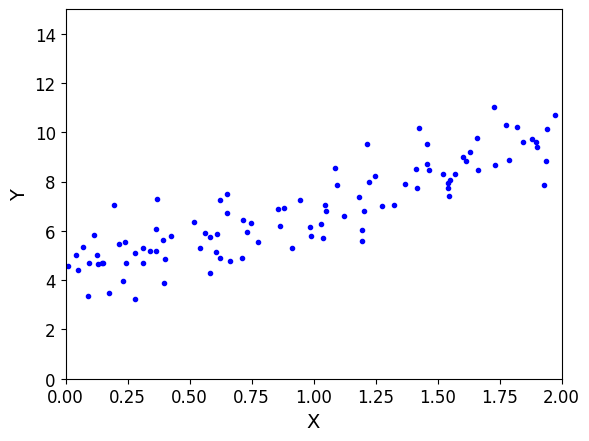

In [17]:
# generating the plot of dummy data to visualize how it looks

plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis([0, 2, 0, 15])
plt.show()

In [19]:
# computing theta vector 

# creating new feature set X_new which is X + np.ones(100, 1) in order to generate theta_not in theta vector

X_new = np.c_[np.ones((100, 1)), X]
theta = np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(Y)

print(theta)
theta

# actual equation is y = 4 + 3*x, theta_not should be 4 but got 4.21 and theta_one should be 3 but got 2.77 this is because
# addition of some noise to y initially Y = 4 + 3 * X + np.random.randn(100, 1) noise : np.random.randn(100, 1)

[[4.21509616]
 [2.77011339]]


array([[4.21509616],
       [2.77011339]])

In [24]:
# taking some point in data set and predicting it's value

x = np.array([[0], [2]])
x_new = np.c_[np.ones((2, 1)), x]

y_predict = x_new.dot(theta)
y_predict

array([[4.21509616],
       [9.75532293]])

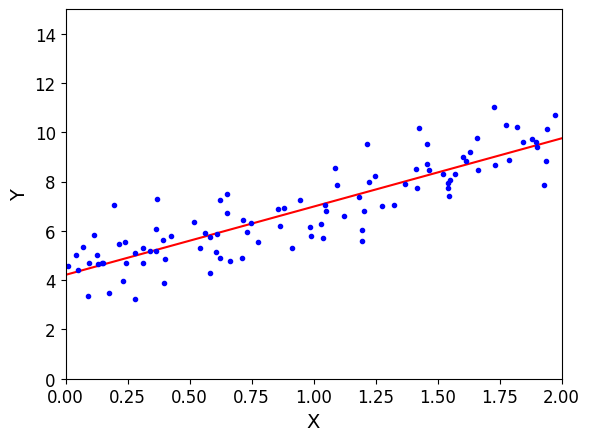

In [27]:
# ploting above prdiction over actual data set created

plt.plot(x, y_predict, "r-")
plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis([0, 2, 0, 15])
plt.show()

In [29]:
# comparing created model parameters with sikit-learn's linear regression

from sklearn.linear_model import LinearRegression

lin_mod = LinearRegression()
lin_mod.fit(X, Y)
lin_mod.intercept_, lin_mod.coef_

# same as my models parameters
# but actually LinearRegression class is not created as above it's created by taking of lots of edge cases, eg: when X^T.X is 
# not invertible, etc.
# it's actually based on scipy.linalg.lstsq() function

(array([4.21509616]), array([[2.77011339]]))

## Linear Regression With Multiple Features

### Gradient Descent

### Batch Gradient Descent

In [31]:
# gradient descent is an optimization algorithm that find the optimal value of the models paramets through continous iterations.
# the batch gradient descent because we are performing gradient descent for more no of features.

# learning rate
eta = 0.1

# no of iterations
iterations = 1000

# no of features
m = 100

# random initialization of theta
theta = np.random.randn(2, 1)

for i in range(iterations):
    gradients = 2/m*X_new.T.dot(X_new.dot(theta)-Y)
    theta = theta - eta*gradients
    
theta

# these are the values we got using normal equation

array([[4.21509616],
       [2.77011339]])

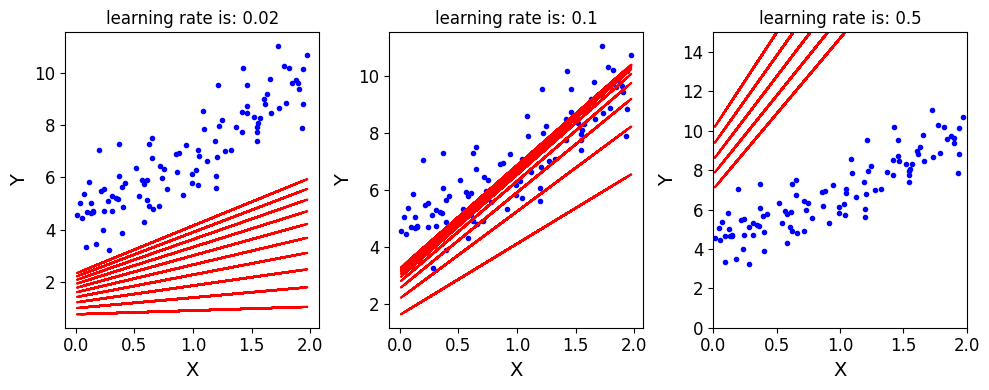

[array([[2.31404603],
        [1.83419846]]),
 array([[3.22330551],
        [3.6244562 ]]),
 array([[-2.40048397],
        [-4.40568573]])]

In [53]:
# ploting graph for different learning rates

etas = [0.02, 0.1, 0.5]
thetas = []
np.random.seed(42)

fig, ax = plt.subplots(1, 3, figsize = (10, 4))

for j in range(len(etas)):
    theta = np.random.randn(2, 1)
    ax[j].plot(X, Y, "b.")
    ax[j].set_title(f"learning rate is: {etas[j]}")
    ax[j].set_xlabel("X")
    ax[j].set_ylabel("Y")
    for i in range(iterations):
        if(i < 10):
            gradients = 2/m*X_new.T.dot(X_new.dot(theta)-Y)
            theta = theta-etas[j]*gradients
            y_predict = X_new.dot(theta)
            ax[j].plot(X, y_predict, "r-")
    thetas.append(theta)

plt.axis([0, 2, 0, 15])
plt.tight_layout()
plt.show()

thetas

### Stochastic Gradient Descent

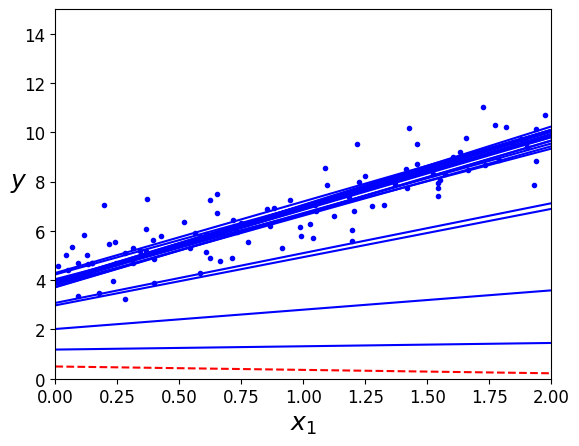

array([[4.21076011],
       [2.74856079]])

In [61]:
m = len(X_new)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                   
            y_predict = x_new.dot(theta)             
            style = "b-" if i > 0 else "r--"         
            plt.plot(x, y_predict, style)           
        random_index = np.random.randint(m)
        xi = X_new[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

plt.plot(X, Y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()    

theta

In [64]:
# sikit learn provides linear regressor that uses sgd as cost function minimizer

# To perform Linear Regression using Stochastic GD with Scikit-Learn, you can use the
# SGDRegressor class, which defaults to optimizing the squared error cost function

from sklearn.linear_model import SGDRegressor

# stops when error is less than tol and under max_iter
lin_mod_sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
lin_mod_sgd.fit(X, Y.ravel())

# theta_not and theta_one
lin_mod_sgd.intercept_, lin_mod_sgd.coef_

(array([4.24365286]), array([2.8250878]))

### Mini-batch Gradient Descent

In [65]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_new_shuffled = X_new[shuffled_indices]
    y_shuffled = Y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_new_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        
theta

array([[4.25214635],
       [2.7896408 ]])

# Polynomial Regression

In [67]:
# dummy data generation

np.random.seed(42)

# no of instances
m = 100

# no of features
n = 1

X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

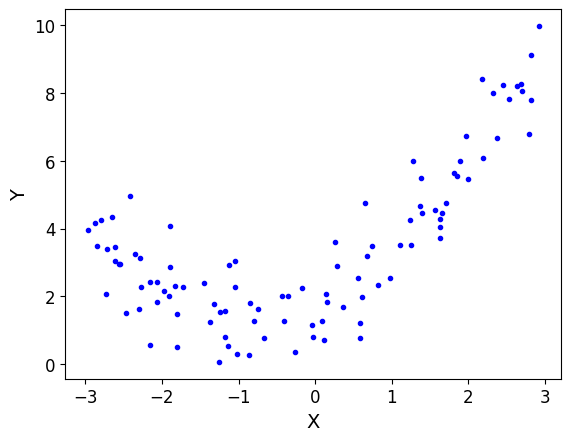

In [69]:
# ploting the summy data created

plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [70]:
# since we can't fit straight line to above data but we can use linear regression
# by creating a new data set that has x^2 as parameter

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = True)
X_new = poly_features.fit_transform(X)

print(X[0], X_new[0])

[-0.75275929] [ 1.         -0.75275929  0.56664654]


In [71]:
# now we have our new dataset ready we will apply linear regression

from sklearn.linear_model import LinearRegression

pol_mod = LinearRegression()
pol_mod.fit(X_new, Y)

pol_mod.intercept_, pol_mod.coef_

# actaul equaiton:  y = 0.5x^2 + 1.0x^1 + 2.0 + Gaussian noise.
# predicted equation: y = 0.56x^2 + 0.93x^1 + 1.78

(array([1.78134581]), array([[0.        , 0.93366893, 0.56456263]]))

In [78]:
X_input = np.linspace(-3, 3, 100).reshape(100, 1)
X_input_new = poly_features.transform(X_input)
y_new = pol_mod.predict(X_input_new)

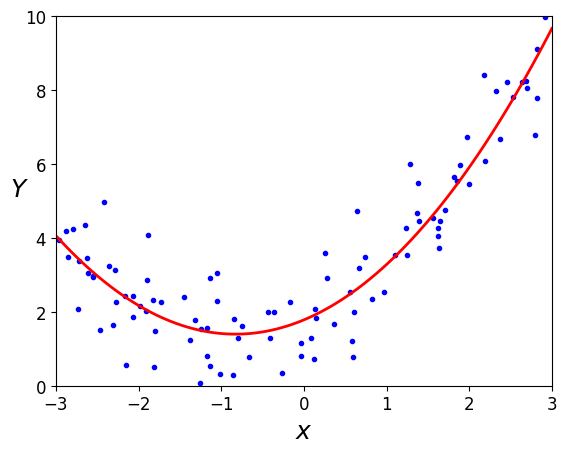

In [87]:
# plot of above prediction

plt.plot(X, Y, "b.")
plt.plot(X_input, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

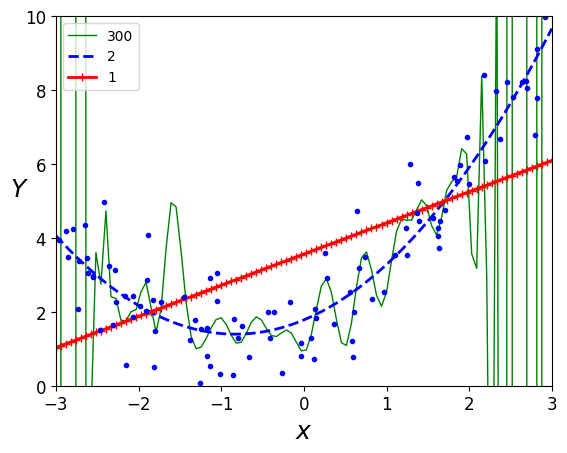

In [88]:
# below is the comparision of how model behaves as we increase degree

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, Y)
    y_newbig = polynomial_regression.predict(X_input)
    plt.plot(X_input, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, Y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

## Learning Curves

In [96]:
# learning curves are best way to discover wheather the model is overfitting,underfitting, bestfitting

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 

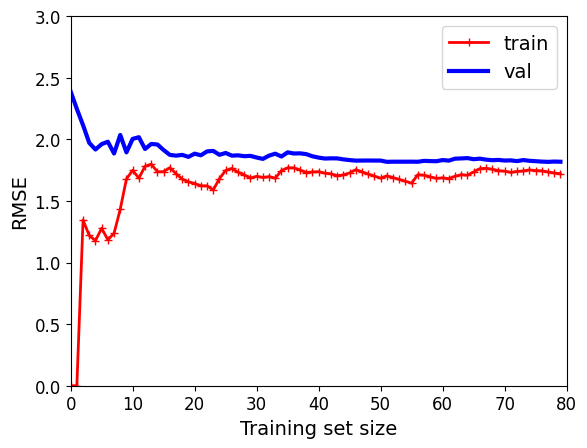

In [97]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, Y)
plt.axis([0, 80, 0, 3])                         
plt.show()        

# the curves are telling that given model is under fitting when undeer fitting occurs one solution to increase model complexity

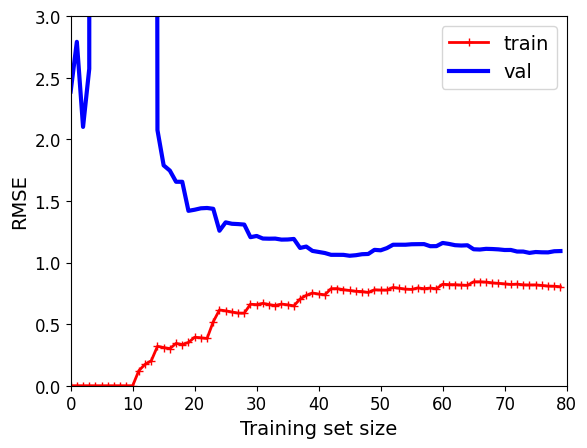

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = True)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(poly_reg, X, Y)
plt.axis([0, 80, 0, 3])
plt.show()

# the below curves are telling the model is overfitting since the training and validation curves not closer
# so increasing training examples decreases overfitting

## Regularized Linear Models

### Ridge Regression

In [9]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [12]:
# performing Ridge Regression with Scikit-Learn using a closed-form solution

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [35]:
# performing Ridge Regression with Scikit-Learn using a sgd

from sklearn.linear_model import SGDRegressor
ridge_sgd_mod = SGDRegressor(penalty = "l2")
ridge_sgd_mod.fit(X, y.ravel())
ridge_sgd_mod.predict([[1.5]])

array([1.4717882])

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

def make_plot(model_class, polynomial, alphas, **model_kwargs):
    for alpha, style in zip(alphas, ("b-", "r--", "g:")):
        model = model_class(alpha, **model_kwargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
                ("std_scalar", StandardScaler()),
                ("regul_reg", model)
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.")
    plt.legend(loc = "upper left")
    plt.xlabel("X")
    plt.ylabel("Y", rotation = 0)
    plt.axis([0, 3, 0, 4])

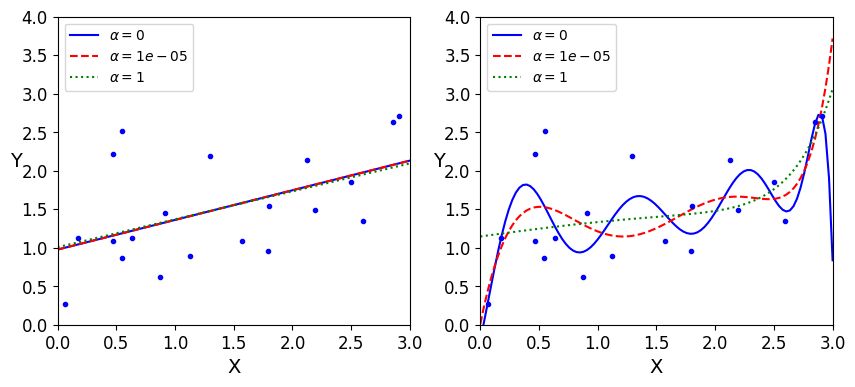

In [37]:
# Comparing how ridge regression regulrizes the linear and polynomial regression at various alpha_values

plt.figure(figsize = (10, 4))

plt.subplot(121)
make_plot(Ridge, False, (0, 10**-5, 1), random_state = 42)

plt.subplot(122)
make_plot(Ridge, True, (0, 10**-5, 1), random_state = 42)

plt.show()

### Lasso Regression

In [38]:
from sklearn.linear_model import Lasso

lass_reg_mod = Lasso(alpha = 0.1)
lass_reg_mod.fit(X, y)
lass_reg_mod.predict([[1.5]])

array([1.53788174])

C:\Users\91934\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.764e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


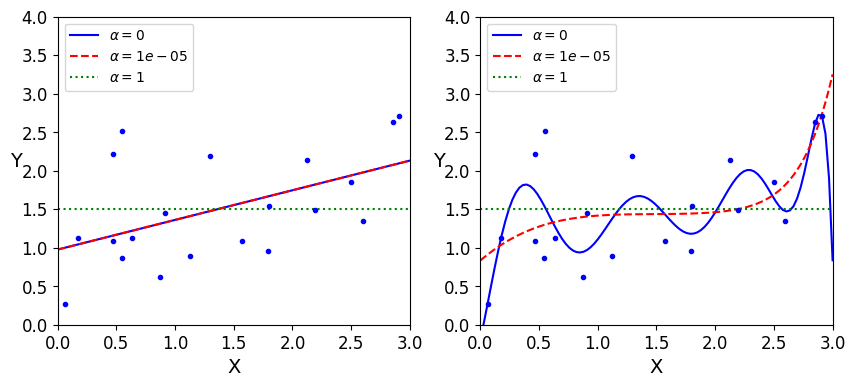

In [39]:
# Comparing how lasso regression regulrizes the linear and polynomial regression at various alpha_values

plt.figure(figsize = (10, 4))

plt.subplot(121)
make_plot(Lasso, False, (0, 10**-5, 1), random_state = 42)

plt.subplot(122)
make_plot(Lasso, True, (0, 10**-5, 1), random_state = 42)

plt.show()

### Elastic Net

In [40]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [14]:
import numpy as np
from copy import deepcopy
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


sgd_reg = SGDRegressor(
    max_iter=1000,  
    tol=1e-3,       
    penalty=None,   
    learning_rate="constant",
    eta0=0.0005,
    random_state=42
)

minimum_val_error = float("inf")
best_model = None

for epoch in range(1000):
    sgd_reg.partial_fit(X_train_poly_scaled, y_train) 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_model = deepcopy(sgd_reg)

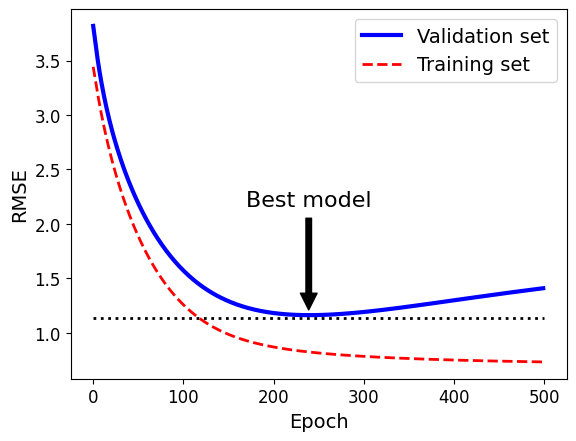

In [19]:
sgd_reg = SGDRegressor(max_iter=1, tol=1e-3, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_poly_scaled, y_train)  
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [20]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', penalty=None,
              random_state=42))

## Logistic Regression

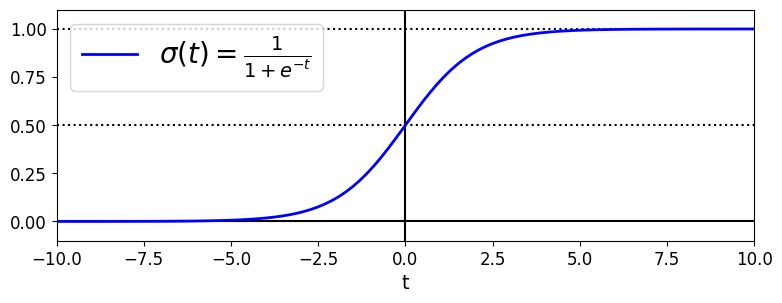

In [22]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [24]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [30]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int)

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

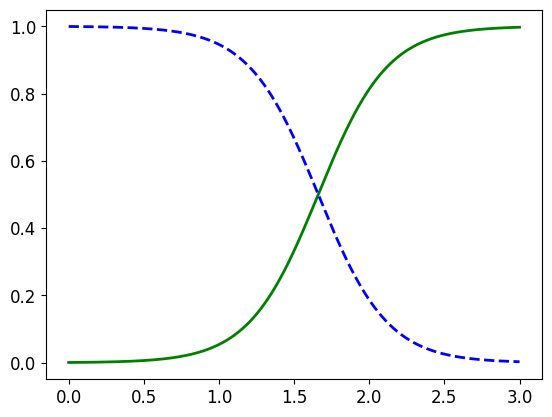

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

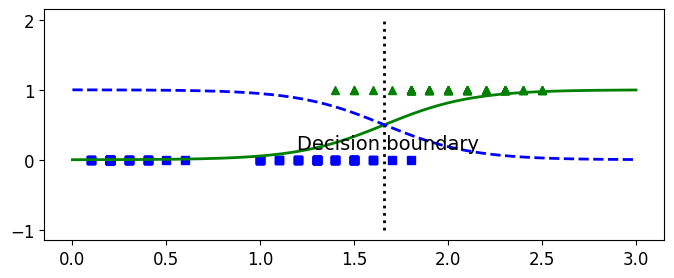

In [39]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[np.argmax(y_proba[:, 1] >= 0.5)]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision boundary", fontsize=14, color="k", ha="center")

# Correcting the arrow plotting
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b', shape='full')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g', shape='full')

plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)


In [35]:
decision_boundary

array([1.66066066])

In [36]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax Regression

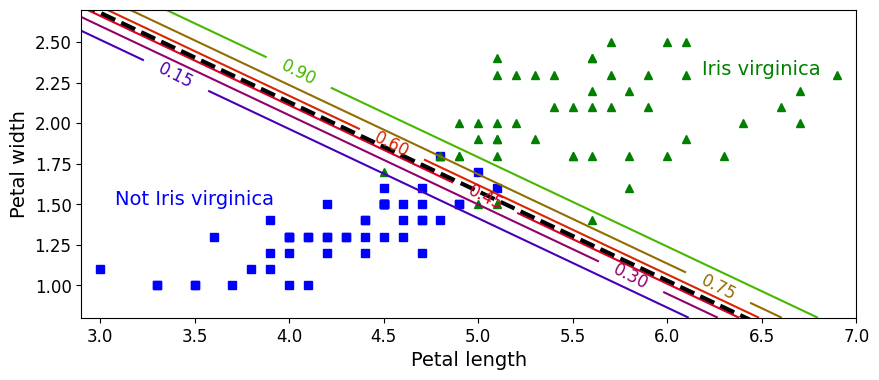

In [41]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [42]:
X = iris["data"][:, (2, 3)]  
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

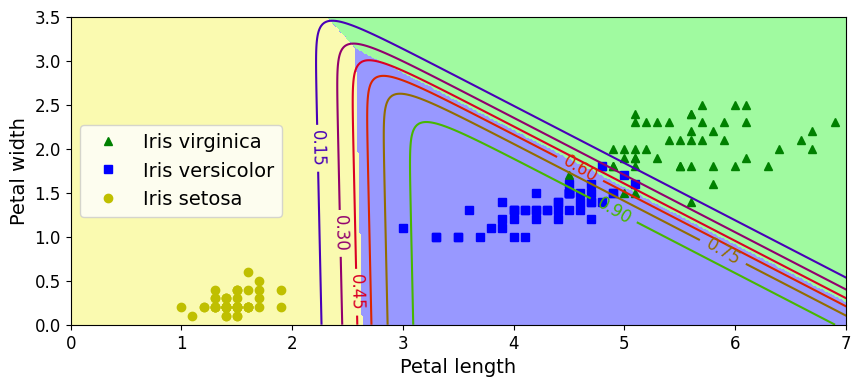

In [44]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()